In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data_Transfer_requests_permitted_or_Denied.csv')
df.head(4)

,From Person,To Person,Type of Data,Permitted or not?
0,McMohan,Jenny,Personal,Yes
1,Phillips,Jenny,Personal,Yes
2,Sunny,Jenny,Personal,Yes
3,Tommy,Jenny,Personal,Yes


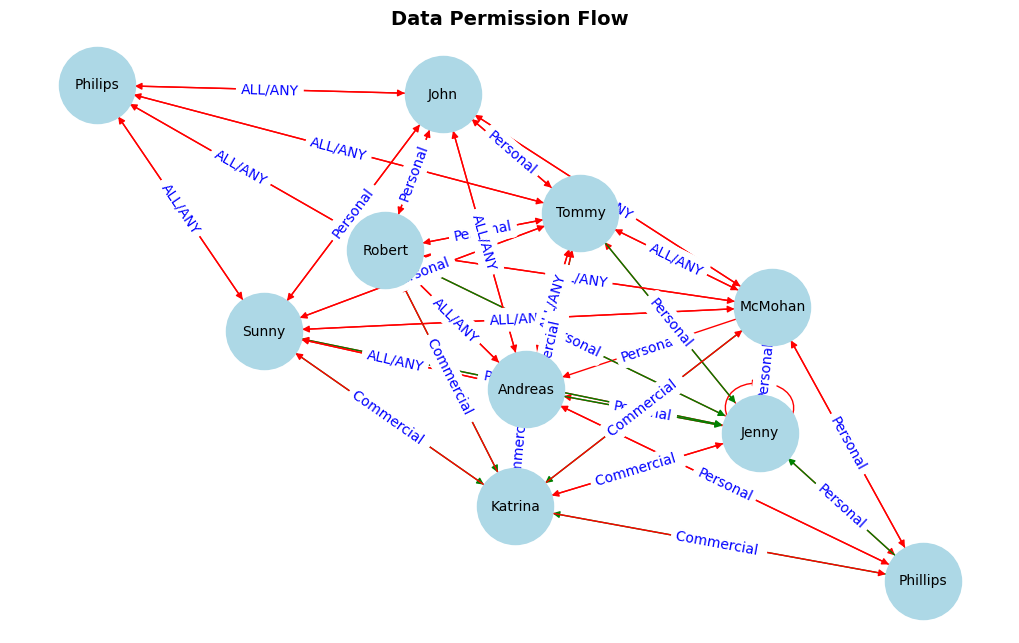

In [6]:
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph with attributes
for _, row in df.iterrows():
    G.add_edge(row['From Person'], row['To Person'], data_type=row['Type of Data'], permitted=row['Permitted or not?'])

# Draw the graph
plt.figure(figsize=(10, 6))

# Define edge colors based on permission
edge_colors = ["green" if G[u][v]['permitted'] == "Yes" else "red" for u, v in G.edges()]

# Define edge labels
edge_labels = {(u, v): G[u][v]['data_type'] for u, v in G.edges()}

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Layout for the graph
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color=edge_colors, node_size=3000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="blue")

plt.title("Data Permission Flow", fontsize=14, fontweight='bold')


plt.savefig('networkplot_data_permission.png')
plt.show()

The red arrows indicate denied permissions, which are prominent in this network, suggesting strict control over data sharing.
Green arrows (permitted) are less frequent, showing that data sharing is highly restricted across the organization.

Jenny appears to be a central figure in this network, as many nodes (people) are connected to her for both permitted and restricted data sharing. This suggests she has a significant role in managing or restricting data flow.

Sunny and Phillips also have multiple outgoing connections, which indicates that  they are significant sources of data.